In [118]:
import mlrose_hiive
import numpy as np 
import time
import matplotlib.pyplot as plt

In [119]:
schedule = mlrose_hiive.ExpDecay(exp_const=0.005)

In [120]:
def gen_time():
    return time.time()

In [131]:
def plot_fitness_per_iteration(data):
    tmp = data["SA"]["fitness_curve_at_largest"]
    plt.plot(range(len(tmp)), tmp[:,0], label = "SA")
    tmp_x = range(len(tmp))[-1]
    tmp_y = tmp[-1][0]
    plt.annotate("{},{}".format(tmp_y,tmp_x),xy=(tmp_x,tmp_y))
    tmp = data["RHC"]["fitness_curve_at_largest"]
    plt.plot(range(len(tmp)), tmp[:,0], label = "RHC")
    tmp_x = range(len(tmp))[-1]
    tmp_y = tmp[-1][0]
    plt.annotate("{},{}".format(tmp_y,tmp_x),xy=(tmp_x,tmp_y))
    tmp = data["GA"]["fitness_curve_at_largest"]
    plt.plot(range(len(tmp)), tmp[:,0], label = "GA")
    tmp_x = range(len(tmp))[-1]
    tmp_y = tmp[-1][0]
    plt.annotate("{},{}".format(tmp_y,tmp_x),xy=(tmp_x,tmp_y))
    tmp = data["MIMIC"]["fitness_curve_at_largest"]
    plt.plot(range(len(tmp)), tmp[:,0], label = "MIMIC")
    tmp_x = range(len(tmp))[-1]
    tmp_y = tmp[-1][0]
    plt.annotate("{},{}".format(tmp_y,tmp_x),xy=(tmp_x,tmp_y))
    plt.title("Fitness / Iteration @100 for 4Peaks Problem") 
    plt.legend() 
    plt.show()

In [132]:
def plot_fitness_per_problem_size(data, problem_size):
    tmp = data["SA"]["fitness_per_problem_size"]
    
    plt.plot(problem_size, tmp, label = "SA", marker='o')
    tmp_x = problem_size[-1]
    tmp_y = tmp[-1]
    plt.annotate("{}".format(tmp_y),xy=(tmp_x,tmp_y))
    tmp = data["RHC"]["fitness_per_problem_size"]
    plt.plot(problem_size, tmp, label = "RHC", marker='o')
    tmp_x = problem_size[-1]
    tmp_y = tmp[-1]
    plt.annotate("{}".format(tmp_y),xy=(tmp_x,tmp_y))
    tmp = data["GA"]["fitness_per_problem_size"]
    plt.plot(problem_size, tmp, label = "GA", marker='o')
    tmp_x = problem_size[-1]
    tmp_y = tmp[-1]
    plt.annotate("{}".format(tmp_y),xy=(tmp_x,tmp_y))
    tmp = data["MIMIC"]["fitness_per_problem_size"]
    plt.plot(problem_size, tmp, label = "MIMIC", marker='o')
    tmp_x = problem_size[-1]
    tmp_y = tmp[-1]
    plt.annotate("{}".format(tmp_y),xy=(tmp_x,tmp_y))
    plt.title("Fitness / Problem Size for 4Peaks Problem")
    plt.legend()
    plt.show()

In [123]:
def plot_wall_clock_per_alg(data):
    x_item = []
    y_item = []
    for k,v in data.items():
        x_item.append(k)
        y_item.append(v["wall_clock_at_largest"])
    bar = plt.bar(x_item, y_item)
    plt.title("Wall Clock / Algorithm for 4Peaks Problem")
    plt.bar_label(bar)
    plt.show()

In [124]:
def plot_wall_clock_per_iteration_per_algorithm(data):
    x_item = []
    y_item = []
    for k,v in data.items():
        x_item.append(k)
        y_item.append(v["wall_clock_per_iteration"])
    bar = plt.bar(x_item, y_item)
    plt.title("Wall Clock on each Iteration / Algorithm for 4Peaks Problem")
    plt.bar_label(bar)
    plt.show()

In [125]:
def run():
    fitness = mlrose_hiive.FourPeaks()
    problem_size = [10,20,30,40,50,60,70,80,90,100]

    res = {}
    res["SA"] = {}
    res["RHC"] = {}
    res["GA"] = {}
    res["MIMIC"] = {}

    # fitness / iteration at 100

    res["SA"]["fitness_curve_at_largest"] = []
    res["RHC"]["fitness_curve_at_largest"] = []
    res["GA"]["fitness_curve_at_largest"] = []
    res["MIMIC"]["fitness_curve_at_largest"] = []

    # fitness / problem size

    res["SA"]["fitness_per_problem_size"] = []
    res["RHC"]["fitness_per_problem_size"] = []
    res["GA"]["fitness_per_problem_size"] = []
    res["MIMIC"]["fitness_per_problem_size"] = []

    # wall clock / algorithm @100 Iteration

    res["SA"]["wall_clock_at_largest"] = 0
    res["RHC"]["wall_clock_at_largest"] = 0
    res["GA"]["wall_clock_at_largest"] = 0
    res["MIMIC"]["wall_clock_at_largest"] = 0

    # algorithm / per iteration at 100

    res["SA"]["wall_clock_per_iteration"] = 0
    res["RHC"]["wall_clock_per_iteration"] = 0
    res["GA"]["wall_clock_per_iteration"] = 0
    res["MIMIC"]["wall_clock_per_iteration"] = 0

    ### SA
    for i in problem_size:
        problem = mlrose_hiive.DiscreteOpt(length = i, fitness_fn = fitness, maximize = True, max_val = 2)

        start_time = gen_time()
        best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem, schedule = schedule,
                                                        max_attempts = 10, max_iters = 1000, random_state = 1, curve = True)
        end_time = gen_time() - start_time
        if i == problem_size[-1]:
            res["SA"]["fitness_curve_at_largest"] = fitness_curve
            res["SA"]["wall_clock_at_largest"] = end_time
            res["SA"]["wall_clock_per_iteration"]=end_time/len(fitness_curve)

        res["SA"]["fitness_per_problem_size"].append(best_fitness)
        

    ### RHC
    for i in problem_size:
        problem = mlrose_hiive.DiscreteOpt(length = i, fitness_fn = fitness, maximize = True, max_val = 2)

        start_time = gen_time()
        best_state, best_fitness, fitness_curve = mlrose_hiive.random_hill_climb(problem,max_attempts = 10, max_iters = 1000, restarts=5, random_state = 1, curve=True)
        end_time = gen_time() - start_time
        if i == problem_size[-1]:
            res["RHC"]["fitness_curve_at_largest"] = fitness_curve
            res["RHC"]["wall_clock_at_largest"] = end_time
            res["RHC"]["wall_clock_per_iteration"] = end_time/len(fitness_curve)

        res["RHC"]["fitness_per_problem_size"].append(best_fitness)
        

    ### GA
    for i in problem_size:
        problem = mlrose_hiive.DiscreteOpt(length = i, fitness_fn = fitness, maximize = True, max_val = 2)

        start_time = gen_time()
        best_state, best_fitness, fitness_curve = mlrose_hiive.genetic_alg(problem,max_attempts = 10, max_iters = 1000, random_state = 1,curve=True)
        end_time = gen_time() - start_time
        if i == problem_size[-1]:
            res["GA"]["fitness_curve_at_largest"] = fitness_curve
            res["GA"]["wall_clock_at_largest"] = end_time
            res["GA"]["wall_clock_per_iteration"]=end_time/len(fitness_curve)

        res["GA"]["fitness_per_problem_size"].append(best_fitness)
        

    ### MIMIC
    for i in problem_size:
        problem = mlrose_hiive.DiscreteOpt(length = i, fitness_fn = fitness, maximize = True, max_val = 2)

        start_time = gen_time()
        best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, keep_pct = 0.2,max_attempts = 10, max_iters = 1000, random_state = 1, curve=True)
        end_time = gen_time() - start_time
        if i == problem_size[-1]:
            res["MIMIC"]["fitness_curve_at_largest"] = fitness_curve
            res["MIMIC"]["wall_clock_at_largest"] = end_time
            res["MIMIC"]["wall_clock_per_iteration"]=end_time/len(fitness_curve)

        res["MIMIC"]["fitness_per_problem_size"].append(best_fitness)
        

    return res, problem_size

    
    

In [126]:
data, problem_size = run()

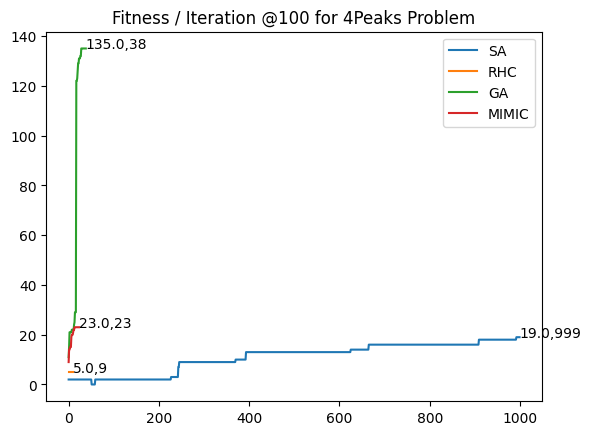

In [133]:
plot_fitness_per_iteration(data)

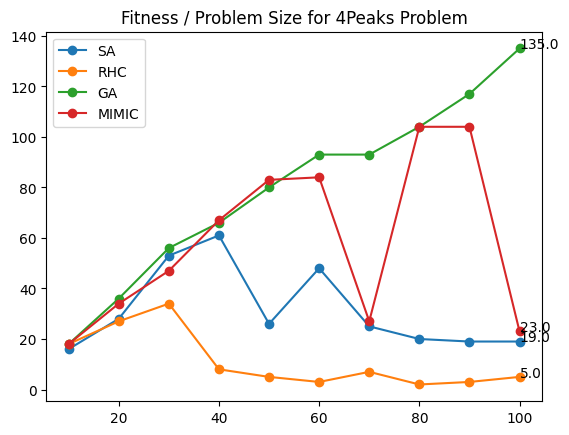

In [134]:
plot_fitness_per_problem_size(data, problem_size)

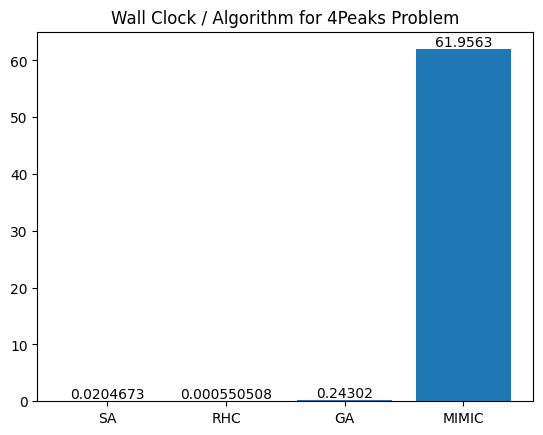

In [129]:
plot_wall_clock_per_alg(data)

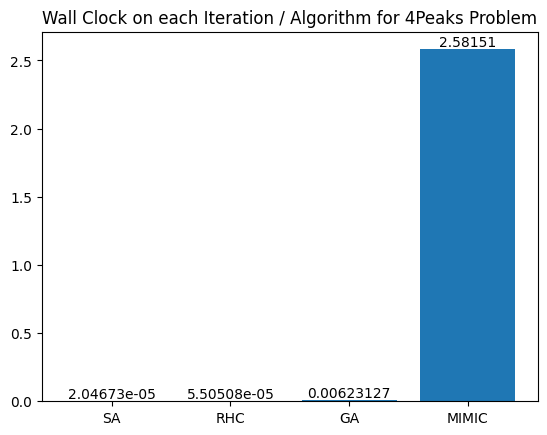

In [130]:
plot_wall_clock_per_iteration_per_algorithm(data)